![](header.jpg)

# Circular Apriltags

Kevin J. Walchko, Phd

27 Feb 2021

---

Most tags are square and look similar to the well known QR tag. However, there are tags (or markers) that have other shapes and are designed to be easily readable from any rotational orientation.

Here, circular apriltags are stored as RGBA (red, green, blue, alpha) PNGs. The alpha layer, which controls opacity of the RGB colors, allows the tag to be easily overlayed onto something else retain a more circular'ish shape. 

Below, I have read in a circular apriltag and then converted the alpha layer to gray (value 127) and saved it back to a new PNG file. This allows you to see the shape of the actual tag (black and white) easier.

![](circ.png)

In [8]:
import cv2
from pupil_apriltags import Detector
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint

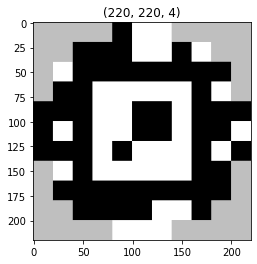

In [32]:
# create the image above with alpha = 127
tmp = cv2.imread("pics/tag49_12_00000.png", cv2.IMREAD_UNCHANGED)
s = 20
h,w = tmp.shape[:2]
tmp = cv2.resize(tmp, (s*h, s*w), interpolation=cv2.INTER_NEAREST)
alpha = tmp[:,:,3] == 0
tmp[alpha] = 127

cv2.imwrite("circ.png", tmp)

plt.imshow(tmp)
plt.title(tmp.shape);

## Finding Tags

A note of **WARNING**, you **MUST** scale up the image for the detector to read it.

In [66]:
def scale(im, s=1.0):
    (h,w) = im.shape
    return cv2.resize(im, (s*h, s*w,), interpolation=cv2.INTER_AREA)

tagdet = [
    "tagCircle21h7",
    "tagCircle49h12",
    "tagCircle21h7"
]

tagimgs = [
    "pics/tag21_07_00020.png",
    "pics/tag49_12_00000.png",
    "pics/tag21_07_00034.png"
]

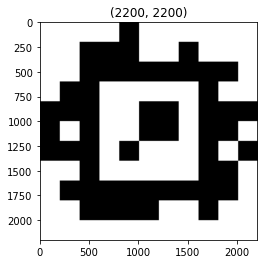

In [55]:
im = cv2.imread(tagimgs[1], cv2.IMREAD_UNCHANGED)

# find alpha layer and set to white or convert to grayscale
alpha = im[:,:,3] == 0
im[alpha] = 255
im = cv2.cvtColor(im, cv2.COLOR_BGRA2GRAY)

# scale to a larger size
im = scale(im, 200)

plt.imshow(im, cmap="gray")
plt.title(im.shape);

In [56]:
d = Detector(families=tagdet[1],
        nthreads=1,
        quad_decimate=1.0,
        quad_sigma=0.0,
        refine_edges=1,
        decode_sharpening=0.25,
        debug=0)

tags = d.detect(
    im, 
    estimate_tag_pose=False, 
    camera_params=None, 
    tag_size=None)

print(f">> {len(tags)} tags found")
for t in tags:
    print("-"*40)
    pprint(t)
print("-"*40)

>> 1 tags found
----------------------------------------
Detection object:
tag_family = b'tagCircle49h12'
tag_id = 0
hamming = 0
decision_margin = 121.42857360839844
homography = [[ 5.00072902e+02 -2.97457532e-01  1.09999269e+03]
 [ 1.57080242e-02  4.99685892e+02  1.09973532e+03]
 [ 1.82469296e-05 -2.87415358e-04  1.00000000e+00]]
center = [1099.99268534 1099.73531998]
corners = [[ 599.80566406 1599.89453125]
 [1600.19885254 1599.86755371]
 [1599.87402344  599.8817749 ]
 [ 600.0557251   599.87225342]]
pose_R = None
pose_t = None
pose_err = None

----------------------------------------


## Fin Others

In [64]:
def go(num):
    print(f"{tagdet[num]} --------------------")
    d = Detector(families=tagdet[num],
            nthreads=1,
            quad_decimate=1.0,
            quad_sigma=0.0,
            refine_edges=1,
            decode_sharpening=0.25,
            debug=0)

    im = cv2.imread(tagimgs[num], 0)

    # scale to a larger size
    im = scale(im, 20)

    plt.imshow(im, cmap="gray")
    plt.title(im.shape);

    tags = d.detect(
        im, 
        estimate_tag_pose=False, 
        camera_params=None, 
        tag_size=None)

    print(f">> {len(tags)} tags found")
    for t in tags:
        print("-"*40)
        pprint(t)
    print("-"*40)

tagCircle21h7 --------------------
>> 1 tags found
----------------------------------------
Detection object:
tag_family = b'tagCircle21h7'
tag_id = 20
hamming = 0
decision_margin = 114.75
homography = [[ 4.99999966e+01  6.12323358e-15  8.98749981e+01]
 [-5.33580781e-06  5.00000000e+01  8.98750000e+01]
 [-3.81469727e-08 -4.67165680e-24  1.00000000e+00]]
center = [89.87499809 89.875     ]
corners = [[ 39.875      139.875     ]
 [139.875      139.875     ]
 [139.875       39.87499619]
 [ 39.875       39.87500381]]
pose_R = None
pose_t = None
pose_err = None

----------------------------------------


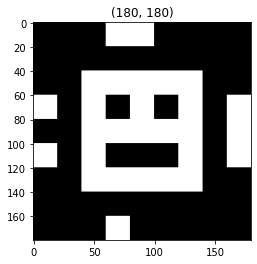

In [65]:
go(0)

tagCircle49h12 --------------------
>> 1 tags found
----------------------------------------
Detection object:
tag_family = b'tagCircle49h12'
tag_id = 0
hamming = 0
decision_margin = 121.42857360839844
homography = [[ 5.00230506e+01 -4.49635244e-02  1.09896914e+02]
 [ 4.49643573e-02  4.99613095e+01  1.09868727e+02]
 [ 2.81246957e-04 -2.81241748e-04  1.00000000e+00]]
center = [109.89691379 109.86872699]
corners = [[ 59.86257172 159.875     ]
 [159.875      159.875     ]
 [159.875       59.91867828]
 [ 59.91882706  59.86245346]]
pose_R = None
pose_t = None
pose_err = None

----------------------------------------


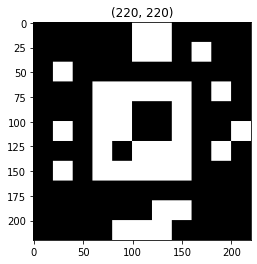

In [62]:
go(1)

tagCircle21h7 --------------------
>> 1 tags found
----------------------------------------
Detection object:
tag_family = b'tagCircle21h7'
tag_id = 34
hamming = 0
decision_margin = 115.90908813476562
homography = [[ 4.99999966e+01  6.12323358e-15  8.98749981e+01]
 [-5.33580781e-06  5.00000000e+01  8.98750000e+01]
 [-3.81469727e-08 -4.67165680e-24  1.00000000e+00]]
center = [89.87499809 89.875     ]
corners = [[ 39.875      139.875     ]
 [139.875      139.875     ]
 [139.875       39.87499619]
 [ 39.875       39.87500381]]
pose_R = None
pose_t = None
pose_err = None

----------------------------------------


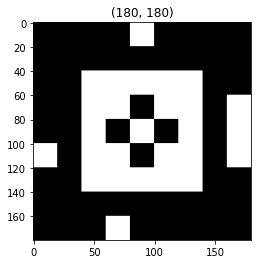

In [67]:
go(2)